# **APPRENTISSAGE AUTOMATIQUE SUPERVISE AVEC SCIKIT LEARN**

## **1. CONDITIONS**

1. Les données ne doivent pas contenir de valeurs manquantes
2. Les données doivent être au format numérique
3. Les données doivent être enregistées dans un *DataFrame Pandas* ou un *Tableau Numpy*

Cela necéssite donc une *Analyse Exploratoire des Données* pour s'assurer que les données sont dans un bon format et qu'elles ne contiennent pas des valeurs manquantes

## **2. LIBRAIRIE PYTHON UTILISEE: Scikit-Learn**

### **FLUX DE TRAVAIL DE SCIKIT LEARN**

>
> 1. Effectuer les imports de librairies nécessaire
>
>   `from sklearn.module import Model`
>
> 2. Create a model instance
>
>   `model = Model()`
>
> 3. fit model to the data
>
> `model.fit(X_train, y_train) X = Feature, y = Target`
>
> 4. Make predictions with new observations
>
> `predictions = model.predict(X_test)`
>


## **3. LES TYPES**
- Classification
- Regression


#### **LIBRAIRIES NECESSAIRES**

In [2]:
# Libraries import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### **A. Classification**

#### 1. K-Nearest Neighbor ou KNN

[[45.07 16.78]
 [27.47 16.62]
 [41.38 10.3 ]
 ...
 [30.74 24.55]
 [36.35 13.57]
 [39.85 22.6 ]]


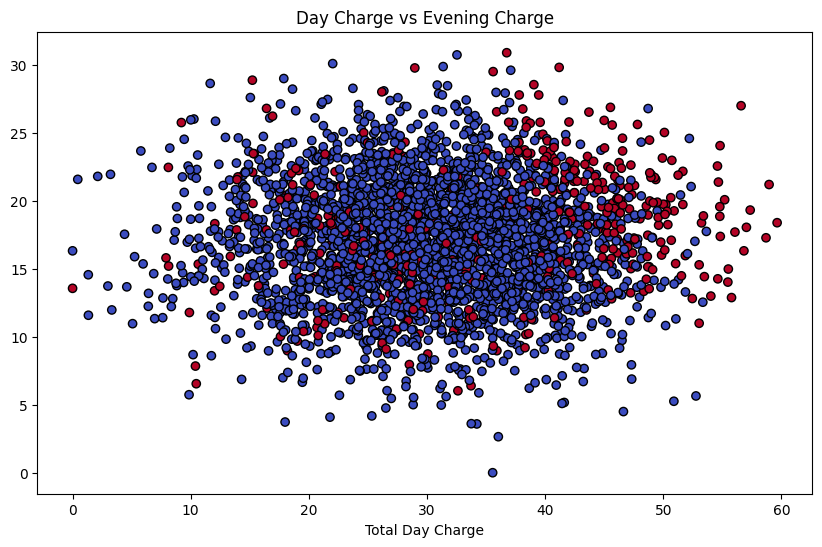

In [3]:
# Importing the dataset
data = pd.read_csv('telecom_churn.csv', index_col=0)
total_day_charge = 'total_day_charge'
total_eve_charge = 'total_eve_charge'
churn = 'churn'
X = data[[total_day_charge, total_eve_charge]].values
y = data[churn].values
# Data visualization
plt.figure(figsize=(10, 6))
plt.title('Day Charge vs Evening Charge')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel('Total Day Charge')
# display heder
print(X)


In [4]:
# Building k Nearest Neighbors model
from sklearn.neighbors import KNeighborsClassifier

# Create knn Model
knn = KNeighborsClassifier(n_neighbors=15)
# Fit the model
knn.fit(X, y)
# Predict the model
X_new = np.array([[56.8, 17.5], [24.4, 24.1], [50.1, 10.9]])
y_pred = knn.predict(X_new)

print("Y values: ", y)
print("Predicted values: ", y_pred)



Y values:  [0 0 0 ... 0 0 0]
Predicted values:  [1 0 0]


In [5]:
# Computing the accuracy
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
# Create knn Model
knn = KNeighborsClassifier(n_neighbors=15)
# Fit the model
knn.fit(X_train, y_train)
# Predict the model
y_pred = knn.predict(X_test)
# Compute the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
accuracy = knn.score(X_test, y_test)
print("Accuracy: ", accuracy)


Accuracy:  0.879
Accuracy:  0.879


### **B. Regression**

In [6]:
#  Loading the dataset
diabetes = pd.read_csv('diabetes.csv')
# Display header
print(diabetes.head(2))

   pregnancies  glucose  diastolic  triceps  ...   bmi    dpf  age  diabetes
0            6      148         72       35  ...  33.6  0.627   50         1
1            1       85         66       29  ...  26.6  0.351   31         0

[2 rows x 9 columns]


(768, 1)


Text(0.5, 1.0, 'BMI vs Glucose')

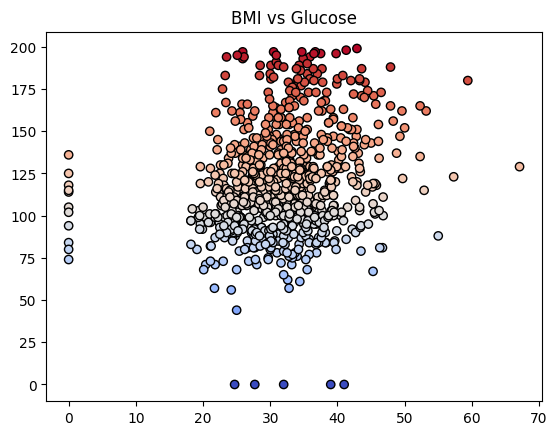

In [7]:
# Feature selection
target = 'glucose'
X = diabetes.drop([target], axis=1).values
y = diabetes[target].values

# Make predictions from a single feature
X_bmi = diabetes[['bmi']].values
y = diabetes[target].values

print(X_bmi.shape)

# Visualize the data
plt.scatter(X_bmi, y, c=y, cmap='coolwarm', edgecolor='k')
plt.title('BMI vs Glucose')


Coefficients:  [0.89650903]


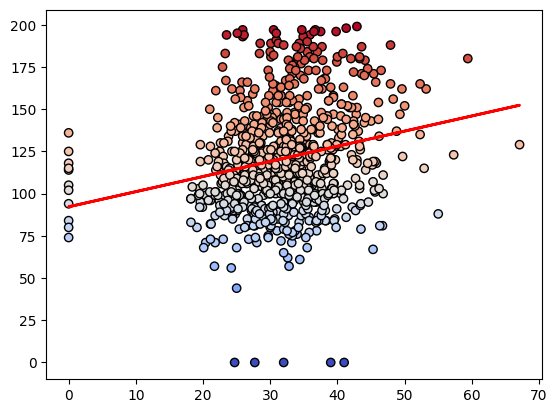

In [8]:
# Running Linear Regression
from sklearn.linear_model import LinearRegression
# Create the model
lin_reg = LinearRegression()
# Fit the model
lin_reg.fit(X_bmi, y)
# Predict the model
y_pred = lin_reg.predict(X_bmi)
# Display the coefficients
print("Coefficients: ", lin_reg.coef_)
# Visualize the data
plt.scatter(X_bmi, y, c=y, cmap='coolwarm', edgecolor='k')
plt.plot(X_bmi, y_pred, color='red', linewidth=2)

In [9]:
# Make predictions from multiple features
X = diabetes.drop([target], axis=1).values
y = diabetes[target].values
# Create the model
lin_reg = LinearRegression()
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
# Fit the model
lin_reg.fit(X_train, y_train)
# Predict the model
y_pred = lin_reg.predict(X_test)
# Compute the accuracy
accuracy = lin_reg.score(X_test, y_test)
print("Accuracy: ", accuracy)
# or
from sklearn.metrics import root_mean_squared_error
score = root_mean_squared_error(y_test, y_pred,)
print("Mean Squared Error: ", score)

Accuracy:  0.28701582460171704
Mean Squared Error:  25.235486520340608


In [10]:
# CROSS VALIDATION 
from sklearn.model_selection import cross_val_score, KFold
# Create the model
kf = KFold(n_splits=6, shuffle=True, random_state=42)
# Create the model
lin_reg = LinearRegression()

# Cross validation scores
cross_val = cross_val_score(lin_reg, X, y, cv=kf)
print("Cross Validation Scores: ", cross_val)


Cross Validation Scores:  [0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]


**REGULARISATION DE LA REGRESSSION**

In [ ]:
# Regression Regularization 
from sklearn.linear_model import Ridge, Lasso
scores = []
alpha_val = [0.1, 1, 10, 100, 1000]
for alpha in alpha_val:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    score = ridge.score(X_test, y_test)
    scores.append(score)

# Display the scores
print("Ridge Scores: ", scores)

Ridge Scores:  [0.28718210812881373, 0.2886488453855751, 0.30075083865691343, 0.3266444676302307, 0.2903861817405353]


Lasso Coefficients:  [-0.35649149  0.13596637 -0.21554028  0.0853862   0.20453655  6.26523149
  0.43988956 27.405956  ]
Features:  Index(['pregnancies', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age',
       'diabetes'],
      dtype='object')
Non-zero features:  Index(['pregnancies', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age',
       'diabetes'],
      dtype='object')


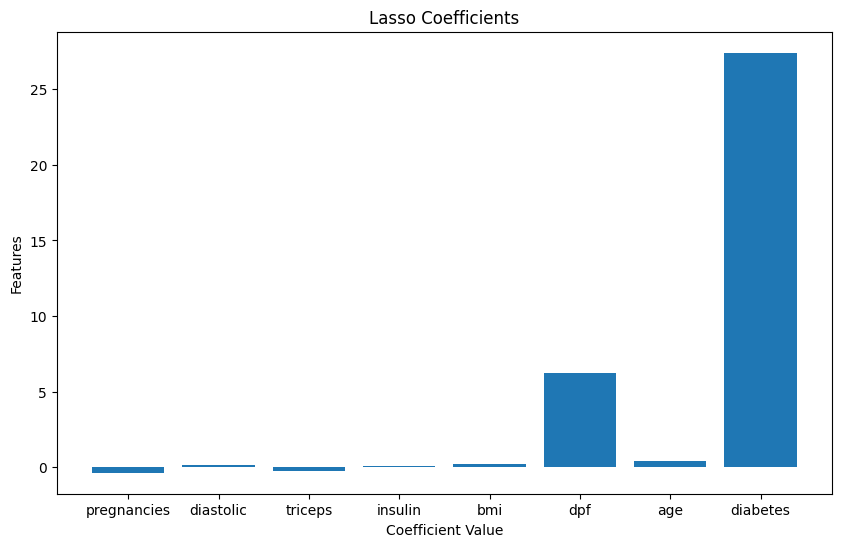

In [17]:
# LASSO FOR FEATURE SELECTION
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
# Display the coefficients
print("Lasso Coefficients: ", lasso.coef_)
# Display the features
features = diabetes.drop([target], axis=1).columns
print("Features: ", features)
# Display the features with non-zero coefficients
non_zero_features = features[lasso.coef_ != 0]
print("Non-zero features: ", non_zero_features)

# VISUALIZATION
# Display the coefficients
plt.figure(figsize=(10, 6))
plt.title('Lasso Coefficients')
# plt.barh(features, lasso.coef_)
plt.bar(features, lasso.coef_)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()


   account_length  area_code  ...  customer_service_calls  churn
0             128        415  ...                       1      0
1             107        415  ...                       1      0

[2 rows x 19 columns]
Confusion Matrix: 
 [[1111   27]
 [ 142   54]]


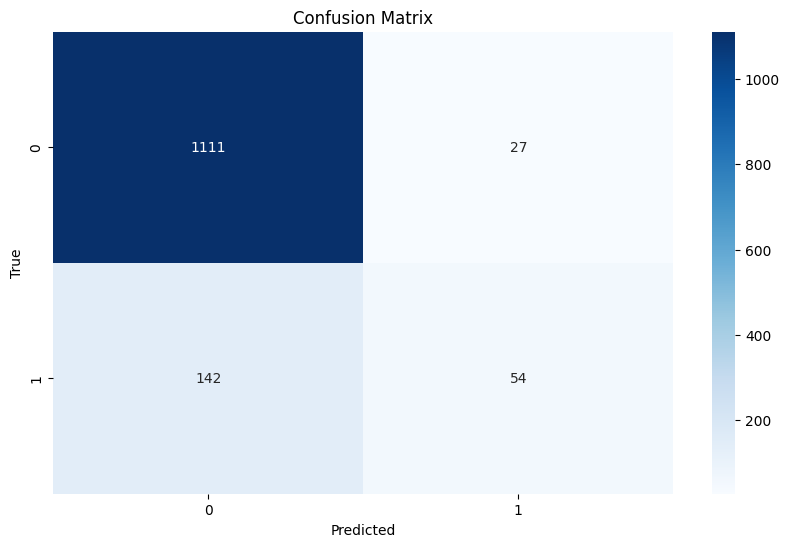

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      1138
           1       0.67      0.28      0.39       196

    accuracy                           0.87      1334
   macro avg       0.78      0.63      0.66      1334
weighted avg       0.85      0.87      0.85      1334



In [20]:
# Confusion Matrix use data dataset
from sklearn.metrics import confusion_matrix, classification_report
data = pd.read_csv('telecom_churn.csv', index_col=0)
print(data.head(2))
X = data[['total_day_charge', 'total_eve_charge']].values
y = data['churn'].values
# Split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the model
knn = KNeighborsClassifier(n_neighbors=7)
# Fit the model
knn.fit(X_train, y_train)
# Predict the model
y_pred = knn.predict(X_test)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)
# Display the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# Display the classification report
print("Classification Report: \n", classification_report(y_test, y_pred))
# ROC CURVE



Predicted Probabilities:  [0.19045734 0.07529387 0.02021964 ... 0.14412454 0.04876933 0.18532017]
Accuracy:  0.8530734632683659
AUC:  0.6761997417596213


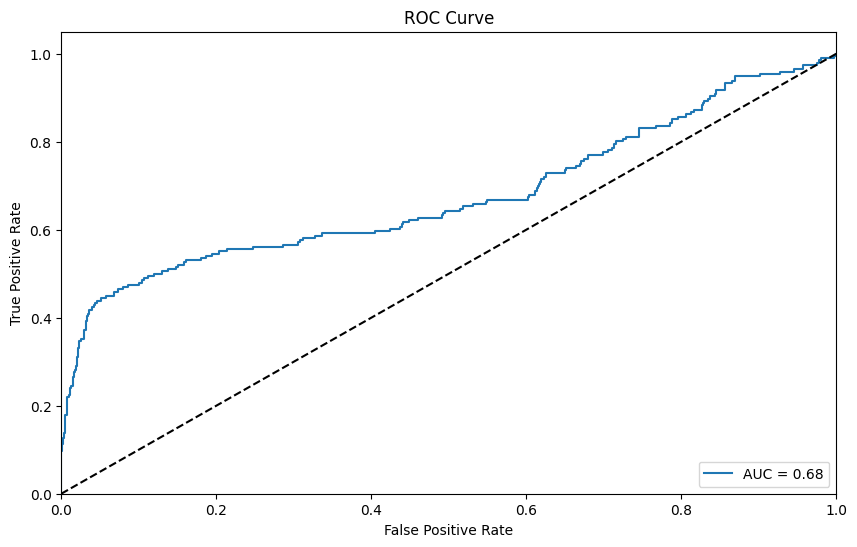

Confusion Matrix: 
 [[1138    0]
 [ 196    0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      1138
           1       0.00      0.00      0.00       196

    accuracy                           0.85      1334
   macro avg       0.43      0.50      0.46      1334
weighted avg       0.73      0.85      0.79      1334

Predicted Probabilities:  [0.19045734 0.07529387 0.02021964 ... 0.14412454 0.04876933 0.18532017]
Predicted Classes:  [False False False ... False False False]
Predicted Classes:  [False False False ... False False False]
Predicted Classes:  [False False False ... False False False]


c:\Users\GEEK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GEEK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GEEK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [ ]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
# Create the model
log_reg = LogisticRegression()
# Fit the model
log_reg.fit(X_train, y_train)
# Predict the model
y_pred = log_reg.predict_proba(X_test)[:, 1]
# Display the predicted probabilities!
# y_pred = np.append(y_pred, y_pred[])
print("Predicted Probabilities: ", y_pred)
# Compute the accuracy
accuracy = log_reg.score(X_test, y_test)
print("Accuracy: ", accuracy)

# ROC CURVE
from sklearn.metrics import roc_curve, roc_auc_score
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Compute the AUC
auc = roc_auc_score(y_test, y_pred)
print("AUC: ", auc)
# Display the ROC curve
plt.figure(figsize=(10, 6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = %.2f' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


**REGLAGE D'HYPERPARAMETRES**

In [33]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
kf = KFold(n_splits=6, shuffle=True, random_state=42)
param_grid = {
    'alpha': np.arange(0.0001, 1, 10),
    'solver': ['sag', 'lsqr'],
}
ridge = Ridge()
grid = GridSearchCV(ridge, param_grid, cv=kf)
grid.fit(X_train, y_train)
# Display the best parameters
print("Best Parameters: ", grid.best_params_)
# Display the best score
print("Best Score: ", grid.best_score_)

Best Parameters:  {'alpha': np.float64(0.0001), 'solver': 'lsqr'}
Best Score:  0.03589616018854933


In [35]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {
    'alpha': np.arange(0.0001, 1, 10),
    'solver': ['sag', 'lsqr'],
}
ridge = Ridge()
random_search = RandomizedSearchCV(ridge, param_distributions, n_iter=10, cv=kf)
random_search.fit(X_train, y_train)
# Display the best parameters
print("Best Parameters: ", random_search.best_params_)
# Display the best score
print("Best Score: ", random_search.best_score_)
# Display the best estimator
print("Best Estimator: ", random_search.best_estimator_)

c:\Users\GEEK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters:  {'solver': 'lsqr', 'alpha': np.float64(0.0001)}
Best Score:  0.03589616018854933
Best Estimator:  Ridge(alpha=np.float64(0.0001), solver='lsqr')
